<p><img src="https://mubeenblogger.com/wp-content/uploads/2022/10/ecommerce-mcommerce-featured-image-5fd09a3a5ff2a.png"></p> 

### This data set contains online retail transactions occured from December 2010 to December 2011, by a UK-based online retailer that mainly.

### In this project, we will explore how to use data analysis techniques to gain insights into customer behavior and preferences. Specifically, we will focus on customer segmentation, which involves grouping customers into segments based on their shared characteristics and behaviors. By segmenting customers in this way, businesses can better understand their needs and preferences, and develop targeted marketing strategies that are more effective at reaching and engaging them.

#### We will begin with the data cleaning procesing. Also we will do some exploratory data analysis to answer / receive valuable information such as: 

<p> What is the frequency of our customers purchasing? </p>
<p> Which products have been returned the most? </p>
<p> Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?</p>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df=pd.read_csv(r'C:\Users\User\OneDrive\Υπολογιστής\data\OnlineRetail.csv',nrows=25_000)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
24995,538351,22078,RIBBON REEL LACE DESIGN,2,12/10/2010 15:17,4.81,NaN,United Kingdom
24996,538351,22080,RIBBON REEL POLKADOTS,1,12/10/2010 15:17,4.21,NaN,United Kingdom
24997,538351,22081,RIBBON REEL FLORA + FAUNA,1,12/10/2010 15:17,4.21,NaN,United Kingdom
24998,538351,22082,RIBBON REEL STRIPES DESIGN,3,12/10/2010 15:17,4.21,NaN,United Kingdom


In [97]:
print(df.info())
print(df.isna().sum())
print("_______________")
print("There is a vast amount of missing values for the Customer_ID column, so these missing values will be droped, because if they are replaced for example with the mean, it will affect our final results")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    25000 non-null  object 
 1   StockCode    25000 non-null  object 
 2   Description  24889 non-null  object 
 3   Quantity     25000 non-null  int64  
 4   InvoiceDate  25000 non-null  object 
 5   UnitPrice    25000 non-null  float64
 6   CustomerID   16056 non-null  float64
 7   Country      25000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB
None
InvoiceNo         0
StockCode         0
Description     111
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     8944
Country           0
dtype: int64
_______________
There is a vast amount of missing values for the Customer_ID column, so these missing values will be droped, because if they are replaced for example with the mean, it will affect our final results


In [98]:
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [99]:
df['CustomerID'] = df['CustomerID'].astype(int)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
24932,C538350,82551,LAUNDRY 15C METAL SIGN,-1,12/10/2010 15:01,1.25,13798,United Kingdom
24933,C538350,35924,HANGING FAIRY CAKE DECORATION,-15,12/10/2010 15:01,1.69,13798,United Kingdom
24934,C538350,22064,PINK DOUGHNUT TRINKET POT,-4,12/10/2010 15:01,1.45,13798,United Kingdom
24935,C538350,22065,CHRISTMAS PUDDING TRINKET POT,-4,12/10/2010 15:01,1.25,13798,United Kingdom


In [100]:
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### What is the frequency of our customers purchasing? 

In [101]:
freq = df.groupby('CustomerID')['InvoiceNo'].nunique()
freq_df = freq.to_frame()

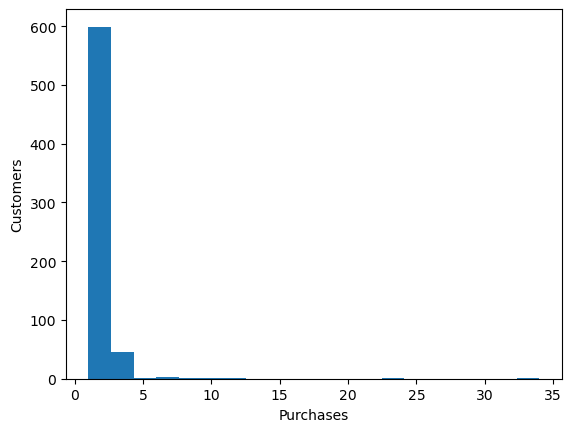

In [102]:
plt.hist(freq, bins=20)
plt.xlabel('Purchases')
plt.ylabel('Customers')
plt.show()

<p> The histogram shows the distribution of the number of purchases made by each customer in the dataset.

The x-axis shows the number of purchases made by each customer, while the y-axis shows the number of customers who made that many purchases.
The histogram can give us an idea of the typical purchasing behavior of customers in the dataset. The histogram is skewed towards the right. In this case, the majority of customers made relatively few purchases (less than 10), while a smaller number of customers made a larger number of purchases.

With the above information, marketing strategies could be developed. To encourage repeat purchases and customer loyalty, it could be offered loyalty programs or personalized recommendations to customers who have made multiple purchases.</p>

###  Negative order quantities indicate returns. Which products have been returned the most?

<p> we will create a dictionary with the stock, description and quantity , in order to see which description corresponds to the most negative quantities. This will also give us the information for the product's title </p>


In [103]:
df_dict = {index: (val1, val2, val3) for index, (val1, val2, val3) in df[["StockCode", "Description", "Quantity"]].iterrows()}

In [104]:
returns = {key: value for key, value in df_dict.items() if value[2] < 0}

In [105]:
returned = pd.DataFrame(returns).T
returned.reset_index(inplace=True)
returned.drop('index',axis=1,inplace=True)

In [106]:
cols = ["StockCode", "Description", "Quantity"]
returned.columns = cols
returned.sort_values(by="Quantity", ascending=True, inplace=True)
returned

,StockCode,Description,Quantity
33,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360
43,22588,CARD HOLDER GINGHAM HEART,-192
40,22574,HEART WOODEN CHRISTMAS DECORATION,-192
44,22130,PARTY CONE CHRISTMAS DECORATION,-144
274,21232,STRAWBERRY CERAMIC TRINKET BOX,-144
...,...,...,...
59,21843,RED RETROSPOT CAKE STAND,-1
143,22197,SMALL POPCORN HOLDER,-1
142,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,-1
230,22138,BAKING SET 9 PIECE RETROSPOT,-1


In [108]:
new=pd.DataFrame(returned.groupby("Description")["Quantity"].sum())
new.reset_index(inplace=True)
new.sort_values(by="Quantity", ascending=True, inplace=True)
new.head(1)

,Description,Quantity
214,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360


### Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

<p> Firstly, we will create a data frame which contains the countryes and the tota quantity for every country </p> 
<p> Then , we will use a bar plot to visualize the quantities 

In [51]:
sizes = pd.DataFrame(df.groupby('Country')['Quantity'].sum())
sizes.reset_index(inplace = True)
sizes

,Country,Quantity
0,Australia,321
1,Belgium,528
2,Channel Islands,80
3,Denmark,454
4,EIRE,3904
5,France,3607
6,Germany,3712
7,Iceland,319
8,Italy,164
9,Japan,1684


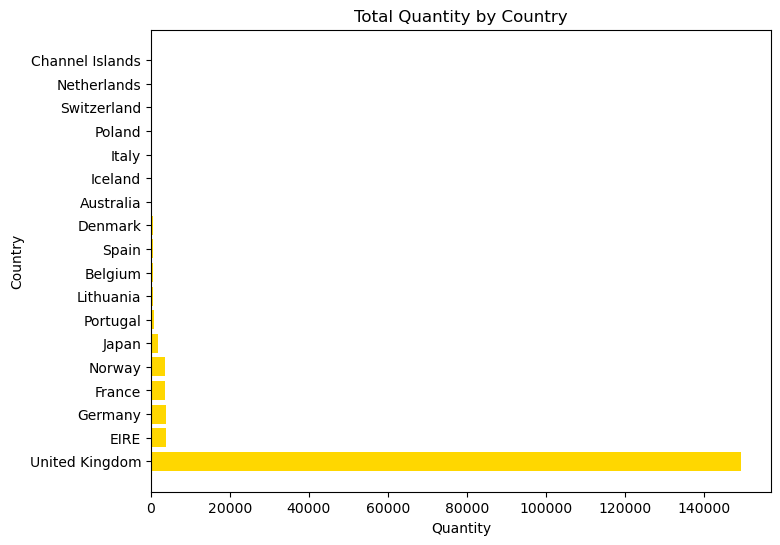

In [52]:
sizes = sizes.sort_values('Quantity', ascending=False)
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(sizes['Country'], sizes['Quantity'], color='gold')
ax.set_title('Total Quantity by Country')
ax.set_xlabel('Quantity')
ax.set_ylabel('Country')
plt.show()

In [16]:
sizes_no_uk = sizes[sizes['Country'] != 'United Kingdom']
total_quantity_no_uk = sizes_no_uk['Quantity'].sum()

20538

In [13]:
df2 = {'Country': ['All countries except UK', 'United Kingdom'],
        'Quantity': [total_quantity_no_uk, sizes[sizes['Country'] == 'United Kingdom']['Quantity'].values[0]]}
df2 = pd.DataFrame(df2)
df2

,Country,Quantity
0,All countries except UK,20538
1,United Kingdom,137090


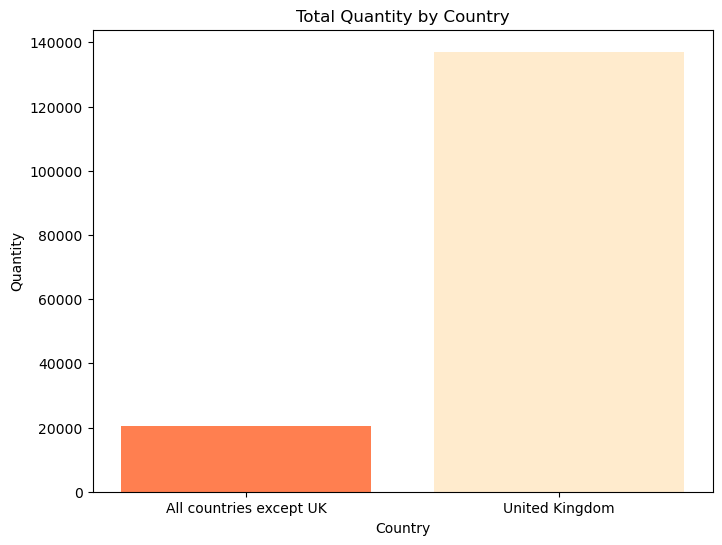

Observing the above graphs we can see that not only the United Kingdom has the highest quantity but if we sumarize the quantities from the other countries , United Kingdom rivals them


In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df2['Country'], df2['Quantity'], color=['coral', 'blanchedalmond'])
ax.set_title('Total Quantity by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Quantity')
plt.show()

print("Observing the above graphs we can see that not only the United Kingdom has the highest quantity but if we sumarize the quantities from the other countries , United Kingdom rivals them")

### Which customers spent more? 

In [109]:
customer_df = df.groupby('CustomerID')['Total'].agg(['sum'])
customer_df.columns = ['TotalSpent']
customer_df = customer_df.sort_values('TotalSpent', ascending=False)
customer_df.head(8)

,TotalSpent
CustomerID,
18102,27834.61
15061,17344.78
13777,6798.16
14911,5567.63
17850,5391.21
16210,4738.54
16029,4271.52
12755,3794.40


### Data preparation for K-means 

### Customer segmentation based on total quantity and total price is a common practice in marketing analysis. The total quantity and total price metrics are important because they provide a measure of how much customers are purchasing. 
### By segmenting customers based on their purchasing behavior, we can better understand their needs and preferences. So in order to cluster customers based on total quantity and total price, we use a clustering algorithm to group customers into segments based on their purchasing behavior. This allows us to identify groups of customers who have similar purchasing patterns

<p> To begin with, we are interested only in positive quantities and not to returned ones. So we will iterrate over the values to get the delete the negative values </p>

In [110]:
for i, row in df.iterrows():
    if row["Quantity"] < 0:
        df = df[df["Quantity"] >= 0]

In [111]:
print( " Its time to visualize our data in scatter plot to see how outliers behave")

 Its time to visualize our data in scatter plot to see how outliers behave


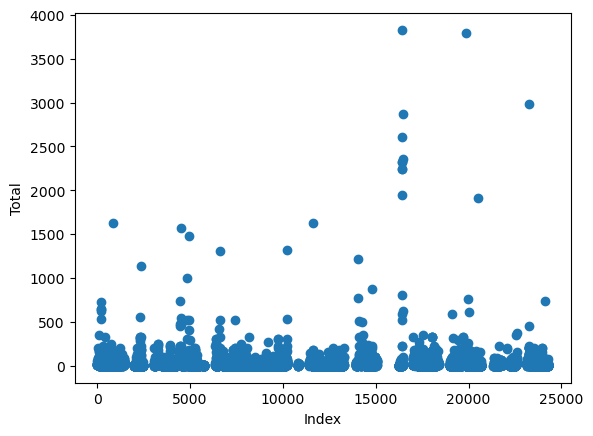

In [112]:
fig, ax = plt.subplots()
ax.scatter(df.index, df['Total'])
ax.set_xlabel('Index')
ax.set_ylabel('Total')
plt.show()

<p> There are some outliers which would affect kmeans results if not deleted. Thus because K-means doesn't work well with outliers. 

Yet we will not deal with the outliers</p>

<p> A data frame which summarizing the total quantity and price will be created, where these metrics will be grouped by the Invoice Number 

In [113]:
grouped = df.groupby('InvoiceNo').agg({'Quantity': 'sum', 'UnitPrice': 'sum'})
grouped = pd.DataFrame({'InvoiceNo': grouped.index, 'TotalQuantity': grouped['Quantity'], 'TotalPrice': grouped['UnitPrice']})
grouped = grouped.drop(['InvoiceNo'], axis=1)
grouped.reset_index(inplace = True)

In [114]:
grouped["new_Total"] = grouped["TotalQuantity"] * grouped["TotalPrice"]

In [115]:
grouped

,InvoiceNo,TotalQuantity,TotalPrice,new_Total
0,536365,40,27.37,1094.80
1,536366,12,3.70,44.40
2,536367,83,58.24,4833.92
3,536368,15,19.10,286.50
4,536369,3,5.95,17.85
...,...,...,...,...
835,538342,47,0.85,39.95
836,538343,170,39.39,6696.30
837,538345,56,17.35,971.60
838,538346,387,85.64,33142.68


#### How the data behave now?  

<AxesSubplot:xlabel='TotalPrice', ylabel='TotalQuantity'>

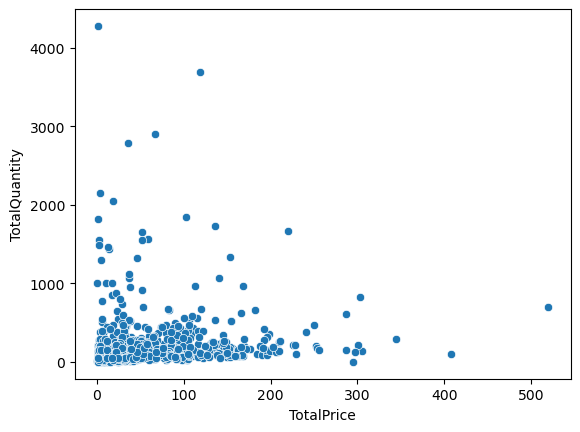

In [116]:
sns.scatterplot(data=grouped, x="TotalPrice", y="TotalQuantity")

<AxesSubplot:>

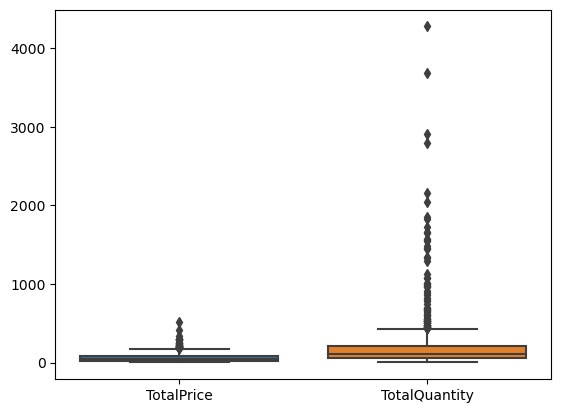

In [79]:
sns.boxplot(data=grouped[['TotalPrice', 'TotalQuantity']])

####  Its time to handle the outliers 

In [117]:
q1 = grouped['TotalQuantity'].quantile(0.10)
q3 = grouped['TotalQuantity'].quantile(0.85)
iqr = q3 - q1
lower_bound = 0.0
upper_bound = q3 + 1.5*iqr

grouped = grouped[(grouped['TotalQuantity'] >= lower_bound) & (grouped['TotalQuantity'] <= upper_bound)]

In [118]:
q1 = grouped['TotalPrice'].quantile(0.10)
q3 = grouped['TotalPrice'].quantile(0.85)
iqr = q3 - q1
lower_bound = 0.0
upper_bound = q3 + 1.5*iqr

grouped = grouped[(grouped['TotalPrice'] >= lower_bound) & (grouped['TotalPrice'] <= upper_bound)]

<p> we will use the quantile method to calculate TotalQuantity and TotalPrice percentiles. The IQR is calculated as the difference between the 85th and 10th percentiles, which will be used to determine the boundaries for outliers. The next line calculates the lower and upper bounds for the 'TotalQuantity' column.

The final line removes any rows in the 'grouped' DataFrame where the 'TotalQuantity' value is less than the lower bound or greater than the upper bound.
Finaly the data frame will contain only values within the range defined by the lower and upper bounds. </p>

In [119]:
grouped

,InvoiceNo,TotalQuantity,TotalPrice,new_Total
0,536365,40,27.37,1094.80
1,536366,12,3.70,44.40
2,536367,83,58.24,4833.92
3,536368,15,19.10,286.50
4,536369,3,5.95,17.85
...,...,...,...,...
835,538342,47,0.85,39.95
836,538343,170,39.39,6696.30
837,538345,56,17.35,971.60
838,538346,387,85.64,33142.68


<AxesSubplot:>

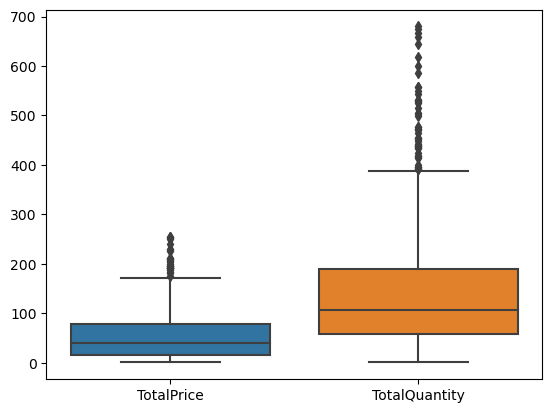

In [83]:
sns.boxplot(data=grouped[['TotalPrice', 'TotalQuantity']])

<AxesSubplot:xlabel='TotalPrice', ylabel='TotalQuantity'>

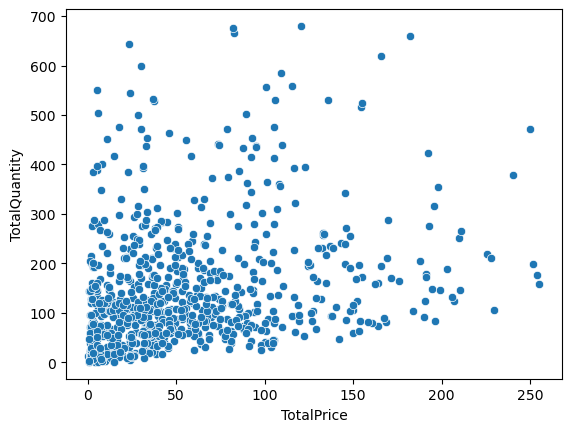

In [120]:
sns.scatterplot(data=grouped, x="TotalPrice", y="TotalQuantity")

<p> All the outliers have been removed and the data seem to be ready for K-means. But first, we need a 2D array for the columns we are interested in. 

In [121]:
TotalQuantity = [ val for val in grouped["TotalQuantity"]]
TotalPrice = [ val for val in grouped["TotalPrice"]]

In [122]:
cluster_array = np.array([TotalQuantity,TotalPrice]).T
cluster_array

array([[ 40.  ,  27.37],
       [ 12.  ,   3.7 ],
       [ 83.  ,  58.24],
       ...,
       [ 56.  ,  17.35],
       [387.  ,  85.64],
       [ 83.  , 126.6 ]])

### Elbow Method 

#### The important quetion is " how many clusters" ? . One  weakness of K-means, is that the we need to indentify how many clusters we need to create in order to get better results. 

#### The elbow method is a popular technique used to determine the optimal number of clusters . We plot the number of clusters against the within-cluster sum of squares (WCSS) and identifying the "elbow point". 

#### Furthermore, In order not to get unstable results in our clusters we will use StandardScaler. We will scale the input data before running the KMeans algorithm so that all the features have the same scale.

In [164]:
X = cluster_array
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [165]:
clusters = []
for k in range(1,10):
    means_model=KMeans(n_clusters=k)
    means_model.fit(cluster_array)
    clusters.append(means_model.inertia_)

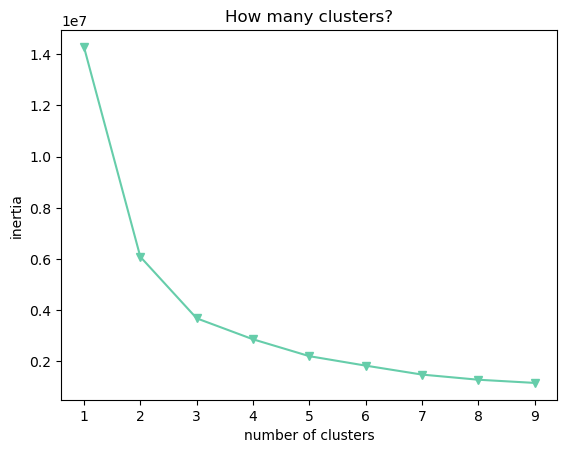

In [169]:
plt.plot(range(1,10), clusters, '-v', color = 'MediumAquamarine')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(range(1,10))
plt.title('How many clusters?')
plt.show()

#### Inertia here, measures how far points are from their centroids. We want clusters that are not spread out ( low inertia ). In the above line plot, we see that Kmeans model with 4 clusters has low inertia. 
#### So, we will choose the 4th point where the inertia begins to decrease slowly.

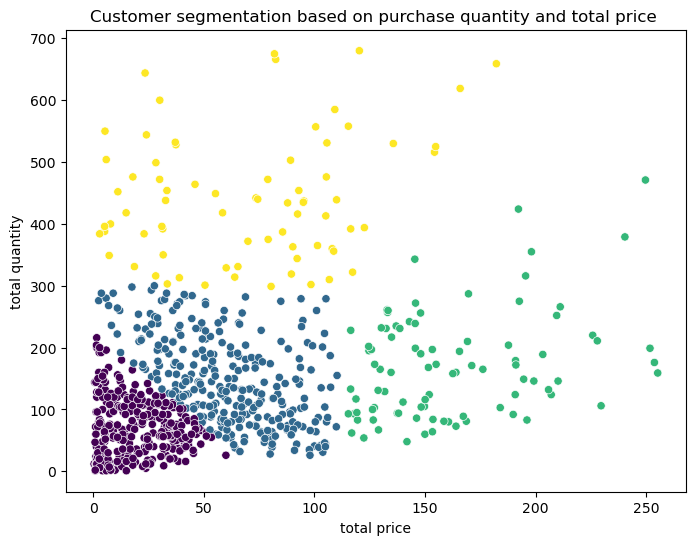

In [170]:
def clustering(kclusters):
    kmeans = KMeans(n_clusters=kclusters, init='k-means++', max_iter=300)
    kmeans.fit(scaled_X)

    fig,ax = plt.subplots(figsize=(8,6))
    sns.scatterplot(x=cluster_array[:,1], y=cluster_array[:,0], c=kmeans.labels_)
    ax.set_xlabel('total price')
    ax.set_ylabel('total quantity')
    ax.set_title('Customer segmentation based on purchase quantity and total price ')

clustering(4)

In [186]:
print("\033[35mcluster 1\033[0m","\n The cluster one , which has the biggest amount in points,are customers who purchase small amounts of quantities with small prices. They are likely low-value customers who make frequent purchases.")
print("\033[34mcluster 2\033[0m","\n The second cluster, is interested in purchasing medium amounts of products with small to medium prices")
print("\033[33mcluster 3\033[0m","\n The third cluster , contains customers with large amounts of purchases but in small to medium prices.They are likely bargain-hunting customers who make infrequent purchases.")
print("\033[32mcluster 4\033[0m","\n The final cluster contains customers who are interested in buying medium amounts of products in large prices.")

cluster 1 
 The cluster one , which has the biggest amount in points,are customers who purchase small amounts of quantities with small prices. They are likely low-value customers who make frequent purchases.
cluster 2 
 The second cluster, is interested in purchasing medium amounts of products with small to medium prices
cluster 3 
 The third cluster , contains customers with large amounts of purchases but in small to medium prices.They are likely bargain-hunting customers who make infrequent purchases.
cluster 4 
 The final cluster contains customers who are interested in buying medium amounts of products in large prices.
